## Model 1b: Single-country policy simulation

The objective of this model-based simulation is to analyse the impact of policy, technology, and commodity changes on consumer price inflation in selected countries. The simulation environment is learnt from real data, after which simulations using synthetic data are used to do policy analysis by manipulating a number of selected variables such as government debt, cellular subscription, gdp growth, and real interest rates in the synthetic data. A secondary purpose of the simulation model is to identify and map the interactions between world-level and country-level indicator variables.

#### Features
------------

Human and technological development indicator timeseries for a country x.

#### Labels
----------

Consumer price inflation levels.

#### Training
------------

Training is done on a feature - single country basis.

### Load and prepare the data

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from tensorflow import keras

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.4f}'.format

In [3]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

In [4]:
tf.__version__

'2.0.0'

In [5]:
country = 'Switzerland'

#### Load and combine the features and labels

In [6]:
features_df = pd.read_csv('features/m_one/%s_features.csv' % country, sep=';', header=0)
labels_df = pd.read_csv('features/m_one/labels_interpolated.csv', sep=';', header=0)

In [7]:
features_df.head()

,date,bank capital to assets ratio,bank nonperforming loans,cereal yield,energy imports,food exports,high-tech exports,inflation,lending interest rate,life expectancy,...,birth deaths,broadband subscriptions,electricity access,co2 emissions,electricity consumption,mobile subscriptions,newborns,overweight,rural population,urban population
0,1960-01-01,0.0000,0.0000,0.0000,0.7167,0.0000,0.0000,0.0000,0.0000,71.3134,...,0.0038,0.0000,0.0000,3.6644,3.0756,0.0000,0.0177,0.0000,0.2908,0.7092
1,1960-02-01,0.0000,0.0000,0.0000,0.7171,0.0000,0.0000,0.0000,0.0000,71.3410,...,0.0038,0.0000,0.0000,3.6717,3.0881,0.0000,0.0178,0.0000,0.2905,0.7095
2,1960-03-01,0.0000,0.0000,0.0000,0.7176,0.0000,0.0000,0.0000,0.0000,71.3687,...,0.0038,0.0000,0.0000,3.6789,3.1006,0.0000,0.0178,0.0000,0.2902,0.7098
3,1960-04-01,0.0000,0.0000,0.0000,0.7180,0.0000,0.0000,0.0000,0.0000,71.3963,...,0.0039,0.0000,0.0000,3.6862,3.1132,0.0000,0.0179,0.0000,0.2900,0.7100
4,1960-05-01,0.0000,0.0000,0.0000,0.7185,0.0000,0.0000,0.0000,0.0000,71.4239,...,0.0039,0.0000,0.0000,3.6935,3.1257,0.0000,0.0179,0.0000,0.2897,0.7103


In [8]:
labels_df.head()

,date,Brazil,China,Colombia,France,Ghana,India,Indonesia,Japan,Netherlands,Senegal,Singapore,Switzerland,United States
0,1960-01-01,0.0000,0.0000,0.0581,0.0414,0.0000,0.0178,0.3959,0.0357,0.0232,0.0000,0.0000,0.0144,0.0146
1,1960-02-01,0.0000,0.0000,0.0602,0.0399,0.0000,0.0178,0.3743,0.0372,0.0224,0.0000,0.0003,0.0147,0.0143
2,1960-03-01,0.0000,0.0000,0.0623,0.0385,0.0000,0.0178,0.3527,0.0387,0.0215,0.0000,0.0007,0.0151,0.0139
3,1960-04-01,0.0000,0.0000,0.0643,0.0371,0.0000,0.0178,0.3312,0.0402,0.0207,0.0000,0.0010,0.0154,0.0136
4,1960-05-01,0.0000,0.0000,0.0664,0.0356,0.0000,0.0177,0.3096,0.0417,0.0199,0.0000,0.0013,0.0157,0.0133


In [9]:
combined_df = pd.concat([features_df, labels_df.drop(columns=['date'])], axis=1)

In [10]:
combined_df.head()

,date,bank capital to assets ratio,bank nonperforming loans,cereal yield,energy imports,food exports,high-tech exports,inflation,lending interest rate,life expectancy,...,France,Ghana,India,Indonesia,Japan,Netherlands,Senegal,Singapore,Switzerland,United States
0,1960-01-01,0.0000,0.0000,0.0000,0.7167,0.0000,0.0000,0.0000,0.0000,71.3134,...,0.0414,0.0000,0.0178,0.3959,0.0357,0.0232,0.0000,0.0000,0.0144,0.0146
1,1960-02-01,0.0000,0.0000,0.0000,0.7171,0.0000,0.0000,0.0000,0.0000,71.3410,...,0.0399,0.0000,0.0178,0.3743,0.0372,0.0224,0.0000,0.0003,0.0147,0.0143
2,1960-03-01,0.0000,0.0000,0.0000,0.7176,0.0000,0.0000,0.0000,0.0000,71.3687,...,0.0385,0.0000,0.0178,0.3527,0.0387,0.0215,0.0000,0.0007,0.0151,0.0139
3,1960-04-01,0.0000,0.0000,0.0000,0.7180,0.0000,0.0000,0.0000,0.0000,71.3963,...,0.0371,0.0000,0.0178,0.3312,0.0402,0.0207,0.0000,0.0010,0.0154,0.0136
4,1960-05-01,0.0000,0.0000,0.0000,0.7185,0.0000,0.0000,0.0000,0.0000,71.4239,...,0.0356,0.0000,0.0177,0.3096,0.0417,0.0199,0.0000,0.0013,0.0157,0.0133


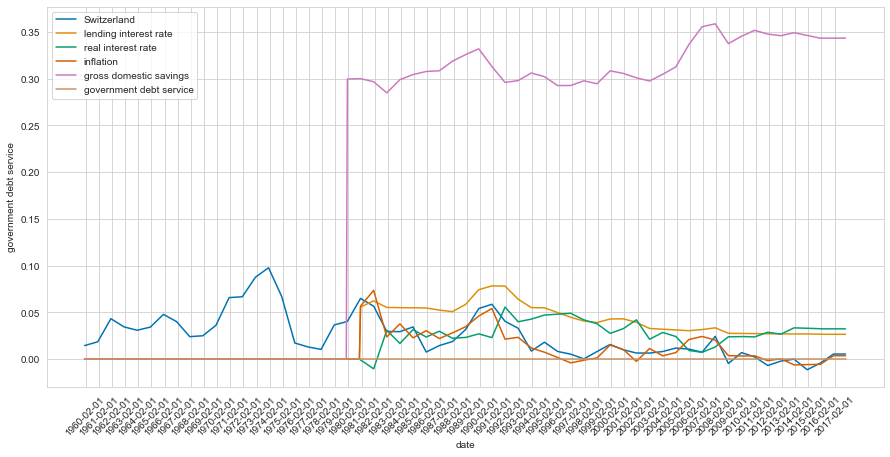

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
[sns.lineplot(x='date', y=c, markers=True, ax=ax, label=c, data=combined_df) for c in list([country, 'lending interest rate', 'real interest rate', 'inflation', 'gross domestic savings', 'government debt service'])]

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 12 == 1:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

ax.set_xticklabels(combined_df['date'], rotation=45);

In [12]:
combined_df.columns

Index(['date', 'bank capital to assets ratio', 'bank nonperforming loans',
       'cereal yield', 'energy imports', 'food exports', 'high-tech exports',
       'inflation', 'lending interest rate', 'life expectancy',
       'population density', 'real interest rate', 'broad money',
       'exports of goods and services', 'gross domestic savings',
       'high-tech value added', 'household consumption expenditure',
       'imports of goods and services', 'listed companies',
       'manufacturing value added', 'r and d spend', 'services trade', 'trade',
       'government debt service', 'government interest payments external debt',
       'government tax revenue', 'birth deaths', 'broadband subscriptions',
       'electricity access', 'co2 emissions', 'electricity consumption',
       'mobile subscriptions', 'newborns', 'overweight', 'rural population',
       'urban population', 'Brazil', 'China', 'Colombia', 'France', 'Ghana',
       'India', 'Indonesia', 'Japan', 'Netherlands', 'Seneg

### Prepare the country features

In [13]:
base_feature_df = combined_df[['date', 'bank capital to assets ratio', 'bank nonperforming loans', 'cereal yield',
                               'energy imports', 'food exports', 'high-tech exports', 'inflation',
                               'lending interest rate', 'life expectancy', 'population density', 'real interest rate',
                               'broad money', 'exports of goods and services', 'gross domestic savings',
                               'high-tech value added', 'household consumption expenditure',
                               'imports of goods and services', 'listed companies', 'manufacturing value added',
                               'r and d spend', 'services trade', 'trade', 'government debt service',
                               'government interest payments external debt', 'government tax revenue', 'birth deaths',
                               'broadband subscriptions', 'electricity access', 'co2 emissions',
                               'electricity consumption', 'mobile subscriptions', 'newborns', 'overweight',
                               'rural population', 'urban population', country]]

In [14]:
base_feature_df.to_csv('features/m_one/combined_country_level_%s.csv' % country.lower(), sep=',', index=False)

In [15]:
base_feature_df['label'] = base_feature_df[country].shift(periods=1)
base_df = base_feature_df.drop(country, axis=1).fillna(0.00);
base_df.set_index('date')

,bank capital to assets ratio,bank nonperforming loans,cereal yield,energy imports,food exports,high-tech exports,inflation,lending interest rate,life expectancy,population density,...,broadband subscriptions,electricity access,co2 emissions,electricity consumption,mobile subscriptions,newborns,overweight,rural population,urban population,label
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.0000,0.0000,0.0000,0.7167,0.0000,0.0000,0.0000,0.0000,71.3134,0.0000,...,0.0000,0.0000,3.6644,3.0756,0.0000,0.0177,0.0000,0.2908,0.7092,0.0000
1960-02-01,0.0000,0.0000,0.0000,0.7171,0.0000,0.0000,0.0000,0.0000,71.3410,0.0000,...,0.0000,0.0000,3.6717,3.0881,0.0000,0.0178,0.0000,0.2905,0.7095,0.0144
1960-03-01,0.0000,0.0000,0.0000,0.7176,0.0000,0.0000,0.0000,0.0000,71.3687,0.0000,...,0.0000,0.0000,3.6789,3.1006,0.0000,0.0178,0.0000,0.2902,0.7098,0.0147
1960-04-01,0.0000,0.0000,0.0000,0.7180,0.0000,0.0000,0.0000,0.0000,71.3963,0.0000,...,0.0000,0.0000,3.6862,3.1132,0.0000,0.0179,0.0000,0.2900,0.7100,0.0151
1960-05-01,0.0000,0.0000,0.0000,0.7185,0.0000,0.0000,0.0000,0.0000,71.4239,0.0000,...,0.0000,0.0000,3.6935,3.1257,0.0000,0.0179,0.0000,0.2897,0.7103,0.0154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,0.0712,0.0074,5.1326,0.5009,0.0392,0.2708,0.0035,0.0265,82.8976,0.2142,...,0.4542,1.0000,4.3116,7.5202,1.3322,0.0105,0.3635,0.2624,0.7376,0.0053
2017-09-01,0.0712,0.0074,5.1326,0.5009,0.0392,0.2708,0.0035,0.0265,82.8976,0.2142,...,0.4542,1.0000,4.3116,7.5202,1.3322,0.0105,0.3635,0.2624,0.7376,0.0053
2017-10-01,0.0712,0.0074,5.1326,0.5009,0.0392,0.2708,0.0035,0.0265,82.8976,0.2142,...,0.4542,1.0000,4.3116,7.5202,1.3322,0.0105,0.3635,0.2624,0.7376,0.0053


In [16]:
num_obs = len(base_df)
num_cols = len(base_df.columns)
num_features = len(base_df.columns) - 1

### Model iterations
---------------------

### Exploration 0

**ARIMA** fitted on the real data.

In [72]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [73]:
ar_params = {
    'lag': 4,
    'difference': 2,
    'moving_average': 1
}

ARIMA dataprep

In [74]:
exo_cols = ['energy imports', 'broad money', 'real interest rate', 'household consumption expenditure',
            'exports of goods and services']

ar_endo = base_df['label'].values
ar_exo = base_df[exo_cols].values

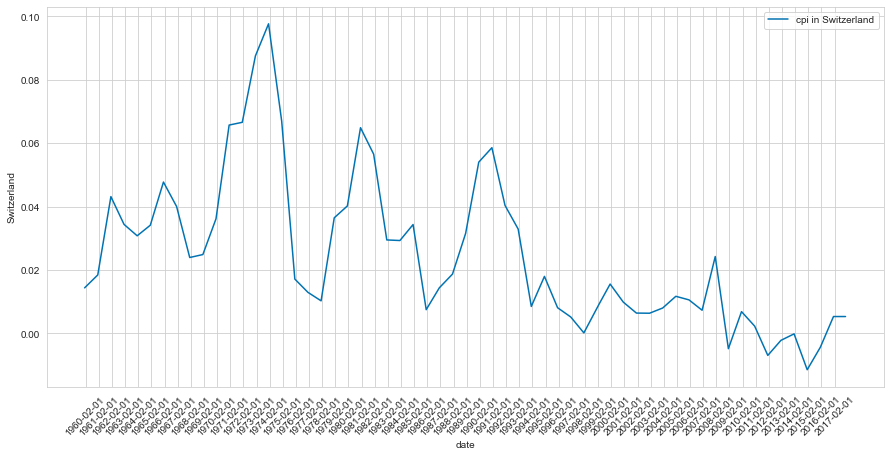

In [75]:
fig, ax = plt.subplots(figsize=(15,7))
[sns.lineplot(x='date', y=c, markers=True, ax=ax, label='cpi in %s' % c, data=combined_df) for c in list([country])]

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 12 == 1:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

ax.set_xticklabels(combined_df['date'], rotation=45);

In [76]:
len(ar_endo)

696

In [77]:
ar_endo_train, ar_endo_test = ar_endo[0:550], ar_endo[551:696]
ar_exo_train, ar_exo_test = ar_exo[0:550], ar_exo[551:696]

In [78]:
ar_exo_test[0]

array([0.54932852, 1.34450481, 0.0104131 , 0.53991155, 0.58205547])

Fit the ARIMA model

In [79]:
arima = ARIMA(ar_endo, order=(ar_params['lag'], ar_params['difference'], ar_params['moving_average']), exog=ar_exo)

In [80]:
arima_fitted = arima.fit()

In [81]:
arima_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  694
Model:                 ARIMA(4, 2, 1)   Log Likelihood                4040.592
Method:                       css-mle   S.D. of innovations              0.001
Date:                Fri, 18 Oct 2019   AIC                          -8057.185
Time:                        13:45:57   BIC                          -8002.675
Sample:                             2   HQIC                         -8036.105
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.610      0.108      -0.003       0.000
x1             0.0016      0.001      1.539      0.124      -0.000       0.004
x2             0.0002      0.000      0.511      0.610      -0.000       0.001
x3             0.0024      0.003      0.849      0.396      -0.003       0.008
x4             0.0002      0.000      0.562      0.574      -0.000       0.001
x5          1.223e-05      0.001      0.014      0.989      -0.002       0.002
ar.L1.D2.y    -0.0602        nan        nan        nan         nan         nan
ar.L2.D2.y    -0.0019      0.041     -0.046      0.964      -0.082       0.078
ar.L3.D2.y     0.0018      0.052      0.035      0.972      -0.101       0.105
ar.L4.D2.y     0.0028      0.054      0.052      0.959      -0.102       0.108
ma.L1.D2.y     0.0526        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.2668           -0.0000j            4.2668           -0.5000
AR.2           -0.4481           -4.3092j            4.3325           -0.2665
AR.3           -0.4481           +4.3092j            4.3325            0.2665
AR.4            4.5066           -0.0000j            4.5066           -0.0000
MA.1          -19.0190           +0.0000j           19.0190            0.5000
-----------------------------------------------------------------------------
"""

#### Evaluate the ARIMA predictions

In [82]:
preds = []
obs = []
hist = [x for x in ar_endo_train]
exo_hist = [x for x in ar_exo_train]

for t in range(len(ar_endo_test)):
    m = ARIMA(hist, order=(ar_params['lag'], ar_params['difference'], ar_params['moving_average']))
    m_fit = m.fit()
    yhat = m_fit.forecast()[0][0]
    preds.append(yhat)
    hist.append(ar_endo_test[t])
    exo_hist.append(ar_exo_test[t])
    if t % 50 == 0:
        print('obs: %s, pred: %s' % (ar_endo_test[t], yhat))

obs: 0.010782627369865284, pred: 0.010849897238485656
obs: 0.006882334487334068, pred: 0.006859895405856868
obs: -0.0020167440760065452, pred: -0.0020438151216605437


In [83]:
predictions = list(map(lambda x: 0.00 if np.isnan(x) else x, preds))

In [84]:
mean_squared_error(ar_endo_test, predictions)

2.5480538793380775e-07

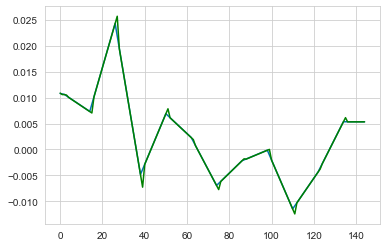

In [85]:
plt.plot(ar_endo_test)
plt.plot(preds, color='green')

### Exploration 1

**Multivariate LSTM** fitted on the real data, see https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
- Activation function: Leaky ReLU.
- Loss function: mean squared error.
- Optimizer: adam.
- Num observations source dataset: 684 (using lagshift, 1960-2016 inclusive monthly)
- Num sequences (@ sequence length 6): 116.
- Batch size: 4-8 sequences (although `size=48` would lead to more stable training)

In [86]:
lstm_params = {
   'sequence_length': 4,
   'batch_size': 8,
   'num_epochs': 50,
   'num_units': 512,
   'lrelu_alpha': 0.35
}

#### LSTM features

In [87]:
lstm_df = base_df[['bank nonperforming loans', 'lending interest rate', 'real interest rate', 
                   'gross domestic savings', 'household consumption expenditure', 'energy imports',
                   'exports of goods and services', 'imports of goods and services', 'services trade', 'trade',
                   'broad money', 'government interest payments external debt', 'government tax revenue']]

In [88]:
num_lstm_cols = len(lstm_df.columns)

In [89]:
features = []
labels = []

for i in range(int(num_obs - 1)):
    labels_df = base_df['label']
    labels.append(labels_df[i:(i+lstm_params['sequence_length'])].values[-1:])
    features.append(lstm_df[i:(i+lstm_params['sequence_length'])].values)

In [90]:
len(features[550:])

145

In [91]:
lstm_train_X = np.asarray(features[0:550])
lstm_train_X = lstm_train_X.reshape((lstm_train_X.shape[0], lstm_params['sequence_length'], num_lstm_cols))
lstm_train_y = np.asarray(labels[0:550])
lstm_train_y = lstm_train_y.reshape((lstm_train_y.shape[0]))

In [92]:
lstm_test_X = np.asarray(features[550:650])
lstm_test_X = lstm_test_X.reshape((lstm_test_X.shape[0], lstm_params['sequence_length'], num_lstm_cols))
lstm_test_y = np.asarray(labels[550:650])
lstm_test_y = lstm_test_y.reshape((lstm_test_y.shape[0]))

In [93]:
X = np.asarray(features[0:650])
X = X.reshape((X.shape[0], lstm_params['sequence_length'], num_lstm_cols))
y = np.asarray(labels[0:650])
y = y.reshape((y.shape[0], 1))

In [94]:
print('X: %s, y: %s' % (X.shape, y.shape))

X: (650, 4, 13), y: (650, 1)


#### Model: LSTM

In [95]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(lstm_params['num_units'],
                               input_shape=(lstm_params['sequence_length'], num_lstm_cols)))
model.add(tf.keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=lstm_params['lrelu_alpha'])))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 512)               1077248   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 1,077,761
Trainable params: 1,077,761
Non-trainable params: 0
_________________________________________________________________


In [96]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=2)

In [97]:
train_run = model.fit(lstm_train_X, lstm_train_y, epochs=lstm_params['num_epochs'],
                      batch_size=lstm_params['batch_size'], callbacks=[early_stopping])

Train on 550 samples
Epoch 1/50
550/550 [==============================] - 4s 8ms/sample - loss: 0.0016
Epoch 2/50
550/550 [==============================] - 2s 4ms/sample - loss: 3.2919e-04
Epoch 3/50
550/550 [==============================] - 2s 4ms/sample - loss: 3.2420e-04
Epoch 4/50
550/550 [==============================] - 2s 4ms/sample - loss: 3.9154e-04
Epoch 5/50
550/550 [==============================] - 2s 4ms/sample - loss: 3.5207e-04


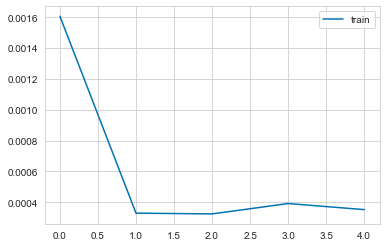

In [98]:
plt.plot(train_run.history['loss'], label='train')
plt.legend()
plt.show()

##### Evaluate model performance

In [99]:
model.evaluate(lstm_test_X, lstm_test_y)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

6.086960842367262e-05

In [100]:
yhat = model.predict(lstm_test_X)

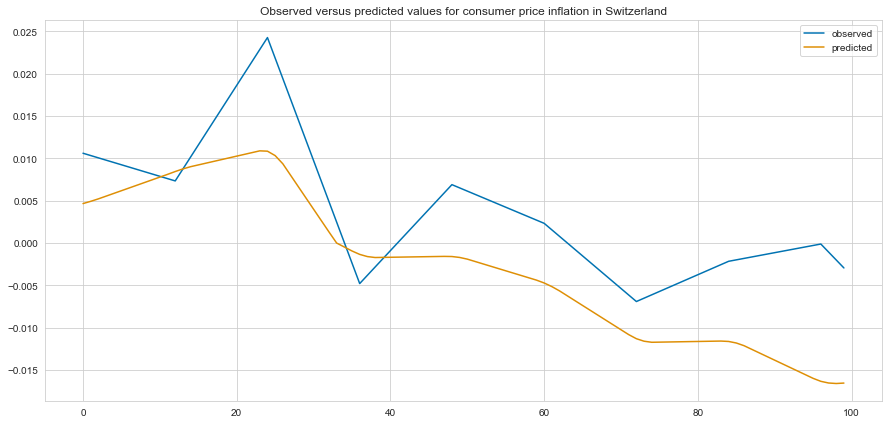

In [101]:
plt.figure(figsize=(15,7))
plt.plot(lstm_test_y, label='observed')
plt.plot(yhat, label='predicted')
plt.legend()
plt.title('Observed versus predicted values for consumer price inflation in %s' % country)
plt.show()

In [102]:
print('rmse: %s\nmean observed: %s\nmean predicted: %s' % (np.sqrt(mean_squared_error(lstm_test_y, yhat)),
                                                           np.mean(lstm_test_y), np.mean(yhat)))

rmse: 0.007801897564520599
mean observed: 0.003844748893956698
mean predicted: -0.0026720993


## Exploration 2
--------------------

**GAN** to generate training data, **LSTM** trained on generated data validated on the real data.

### Conditional GAN for policy-constrained timeseries generation

See https://arxiv.org/pdf/1706.02633.pdf.

In [48]:
from keras.models import Sequential, Model
from keras.layers import Input
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [49]:
gan_df = base_df[['bank nonperforming loans', 'lending interest rate', 'real interest rate',
                  'gross domestic savings', 'household consumption expenditure', 'exports of goods and services',
                  'imports of goods and services', 'services trade', 'trade', 'broad money',
                  'government interest payments external debt', 'government tax revenue']]
gan_df.shape

(696, 12)

In [50]:
gan_cols = gan_df.shape[1]

In [51]:
gan_params = {
   'num_epochs': 100,
   'save_interval': 100,
   'sequence_length': 4,
   'num_variables': gan_cols,
   'batch_size': 8,
   'lr': 0.001 
}

In [52]:
generator_params = {
   'noise_sigma': 0.2,
   'lstm_units': 128,
   'lstm_dropout': 0.3,
   'gru_units': 64,
   'gru_dropout': 0.2,
   'lr': 0.001
}

In [53]:
discriminator_params = {
   'bi_lstm_units': 64,
   'dropout_rate': 0.4,
   'lr': 0.001
}

#### GAN input sequences

The collated World Bank and IMF data used as input for the data generator and to validate the model trained on generated data.

In [54]:
gan_features = []
gan_labels = []

for i in range(int(num_obs)):
    gan_labels_df = base_df['label']
    gan_labels.append(gan_labels_df[i:(i+gan_params['sequence_length'])].values[-1:])
    gan_features.append(gan_df[i:(i+gan_params['sequence_length'])].values)

In [55]:
real = np.asarray(gan_features[0:650])
real = real.reshape((real.shape[0], gan_params['sequence_length'], gan_cols))

In [56]:
real.shape

(650, 4, 12)

#### Generator

In [57]:
def build_encoder(params):
    gshape = params['sequence_length'], params['num_variables']
    inputs = tf.keras.layers.Input(shape=(gshape))
    
    e = tf.keras.models.Sequential(name='encoder')
    e.add(tf.keras.layers.LSTM(params['lstm_units'], input_shape=(gshape), return_sequences=True))
    e.add(tf.keras.layers.Dropout(params['lstm_dropout']))
    e.add(tf.keras.layers.GaussianNoise(stddev=params['noise_sigma']))
    e.add(tf.keras.layers.BatchNormalization(axis=2, momentum=0.8, epsilon=0.01))
    e.add(tf.keras.layers.Dense(params['num_variables'], activation='relu'))
    e.summary()
    
    return tf.keras.models.Model(inputs, e(inputs))

In [58]:
encoder = build_encoder({**gan_params, **generator_params})

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4, 128)            72192     
_________________________________________________________________
dropout (Dropout)            (None, 4, 128)            0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 4, 128)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 128)            512       
_________________________________________________________________
dense_1 (Dense)              (None, 4, 12)             1548      
Total params: 74,252
Trainable params: 73,996
Non-trainable params: 256
_________________________________________________________________


In [59]:
def build_generator(params):
    gshape = params['sequence_length'], params['num_variables']
    inputs = tf.keras.layers.Input(shape=(gshape))
    
    g = tf.keras.models.Sequential(name='generator')
    g.add(tf.keras.layers.GRU(params['gru_units'], input_shape=(gshape), return_sequences=True))
    g.add(tf.keras.layers.Dropout(params['gru_dropout']))
    g.add(tf.keras.layers.Dense(params['num_variables'], activation='tanh'))
    g.add(tf.keras.layers.Reshape(target_shape=(gshape)))
    g.summary()
    
    return tf.keras.models.Model(inputs, g(inputs))

In [60]:
generator = build_generator({**gan_params, **generator_params})

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 4, 64)             14976     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4, 12)             780       
_________________________________________________________________
reshape (Reshape)            (None, 4, 12)             0         
Total params: 15,756
Trainable params: 15,756
Non-trainable params: 0
_________________________________________________________________


#### Discriminator

In [61]:
def build_discriminator(params):
    dshape = params['sequence_length'], params['num_variables']
    batch_shape = params['batch_size'], params['sequence_length'], params['num_variables']
    
    real = tf.keras.layers.Input(shape=(dshape))
    generated = tf.keras.layers.Input(shape=(dshape))
    inputs = tf.keras.layers.concatenate([generated, real], axis=1)
    
    d = tf.keras.models.Sequential(name='discriminator')
    d.add(tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(params['bi_lstm_units']), batch_input_shape=(batch_shape)))
    d.add(tf.keras.layers.Dropout(params['dropout_rate']))
    d.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    d.summary()
    return tf.keras.models.Model([generated, real], d(inputs))

In [62]:
discriminator = build_discriminator({**gan_params, **discriminator_params})
discriminator.compile(loss='binary_crossentropy', 
                      optimizer=tf.keras.optimizers.Adam(lr=discriminator_params['lr']), metrics=['accuracy'])

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (8, 128)                  39424     
_________________________________________________________________
dropout_2 (Dropout)          (8, 128)                  0         
_________________________________________________________________
dense_3 (Dense)              (8, 1)                    129       
Total params: 39,553
Trainable params: 39,553
Non-trainable params: 0
_________________________________________________________________


#### GAN

Bidirectional generative adversarial network, viz https://arxiv.org/abs/1605.09782.

In [63]:
def build_gan(encoder, generator, discriminator, params):
    ganshape = params['sequence_length'], params['num_variables']
    discriminator.trainable = False
    
    noise = tf.keras.layers.Input(shape=(ganshape))
    generated = generator(noise)
    
    data = tf.keras.layers.Input(shape=(ganshape))
    encoded = encoder(data)
    
    fake = discriminator([noise, generated])
    real = discriminator([encoded, data])
    
    gan = tf.keras.models.Model([noise, data], [fake, real], name='gan')
    gan.summary()
    return gan

In [64]:
gan = build_gan(encoder, generator, discriminator, gan_params)
gan.compile(loss=['binary_crossentropy', 'mean_squared_error'], 
            optimizer=tf.keras.optimizers.Adam(lr=generator_params['lr']), metrics=['accuracy', 'mse'])

Model: "gan"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 4, 12)]      0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 4, 12)]      0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 4, 12)        15756       input_5[0][0]                    
__________________________________________________________________________________________________
model (Model)                   (None, 4, 12)        74252       input_6[0][0]                    
________________________________________________________________________________________________

In [65]:
def train_gan(real, batch_size, params):
    g_metrics = []
    d_real_metrics = []
    d_synth_metrics = []
    
    reals = np.ones(batch_size)
    synths = np.zeros(batch_size)
    
    for i in range(params['num_epochs']):
        # create input of real and synthetic data
        random_index = np.random.randint(0, len(real) - batch_size)
        half_real = real[random_index:int(random_index + batch_size)]
        half_synth = np.random.normal(-1.0, 1.0, size=[batch_size, params['sequence_length'], real.shape[2]])
        
        # apply generator and encoder
        generated = generator.predict(half_synth)
        encoded = encoder.predict(half_real)
        
        # train discriminator
        d_real = discriminator.train_on_batch([encoded, half_real], reals)
        d_synth = discriminator.train_on_batch([half_synth, generated], synths)
                                                            
        # train gan
        gen_ = gan.train_on_batch([generated, encoded], [reals, synths])
        if i % 10 == 0:
            print('Epoch %s losses: discriminator real: %.4f%%, discriminator synth: %.4f%%, generator: %.4f%%' % 
                  (i, d_real[0], d_synth[0], gen_[0]))
        
        d_real_metrics.append(d_real)
        d_synth_metrics.append(d_synth)
        g_metrics.append(gen_)
    return d_real_metrics, d_synth_metrics, g_metrics

In [66]:
d_r_metrics, d_s_metrics, g_metrics = train_gan(real, gan_params['batch_size'], gan_params)

Epoch 0 losses: discriminator real: 0.7346%, discriminator synth: 0.6094%, generator: 0.9875%
Epoch 10 losses: discriminator real: 0.6375%, discriminator synth: 0.0837%, generator: 1.0691%
Epoch 20 losses: discriminator real: 0.0188%, discriminator synth: 0.0093%, generator: 0.9597%
Epoch 30 losses: discriminator real: 0.0074%, discriminator synth: 0.0040%, generator: 0.9380%
Epoch 40 losses: discriminator real: 0.0022%, discriminator synth: 0.0034%, generator: 0.9843%
Epoch 50 losses: discriminator real: 0.0009%, discriminator synth: 0.0042%, generator: 0.9876%
Epoch 60 losses: discriminator real: 0.0026%, discriminator synth: 0.0001%, generator: 0.9780%
Epoch 70 losses: discriminator real: 0.0429%, discriminator synth: 0.0015%, generator: 0.9852%
Epoch 80 losses: discriminator real: 0.0284%, discriminator synth: 0.0038%, generator: 0.9909%
Epoch 90 losses: discriminator real: 0.0012%, discriminator synth: 0.0008%, generator: 1.0553%


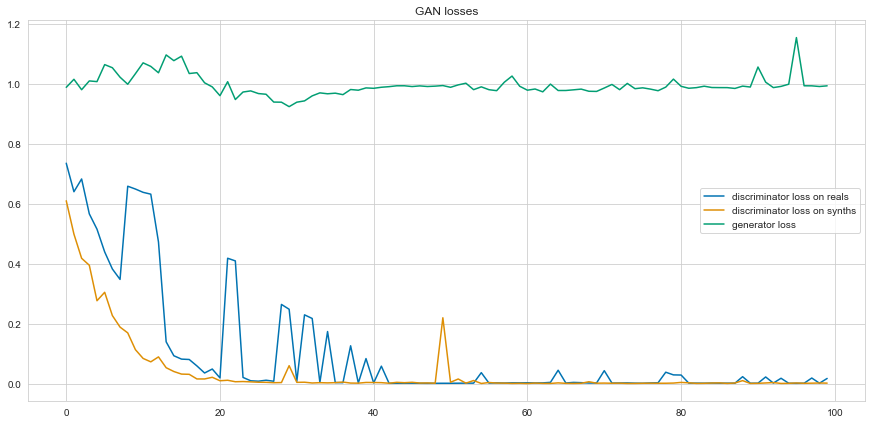

In [67]:
plt.figure(figsize=(15,7))
plt.plot([metrics[0] for metrics in d_r_metrics], label='discriminator loss on reals')
plt.plot([metrics[0] for metrics in d_s_metrics], label='discriminator loss on synths')
plt.plot([metrics[0] for metrics in g_metrics], label='generator loss')
plt.legend()
plt.title('GAN losses')
plt.show()

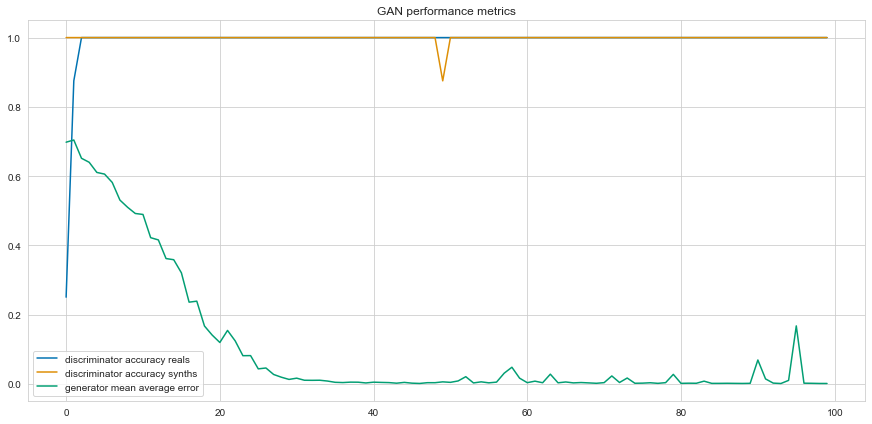

In [68]:
plt.figure(figsize=(15,7))
plt.plot([metrics[1] for metrics in d_r_metrics], label='discriminator accuracy reals')
plt.plot([metrics[1] for metrics in d_s_metrics], label='discriminator accuracy synths')
plt.plot([metrics[1] for metrics in g_metrics], label='generator mean average error')
plt.legend()
plt.title('GAN performance metrics')
plt.show()

In [69]:
generated_y = generator.predict(np.random.rand(num_obs, gan_params['sequence_length'], gan_cols))[:,-1,-1]
gan_y = base_df['label'].values

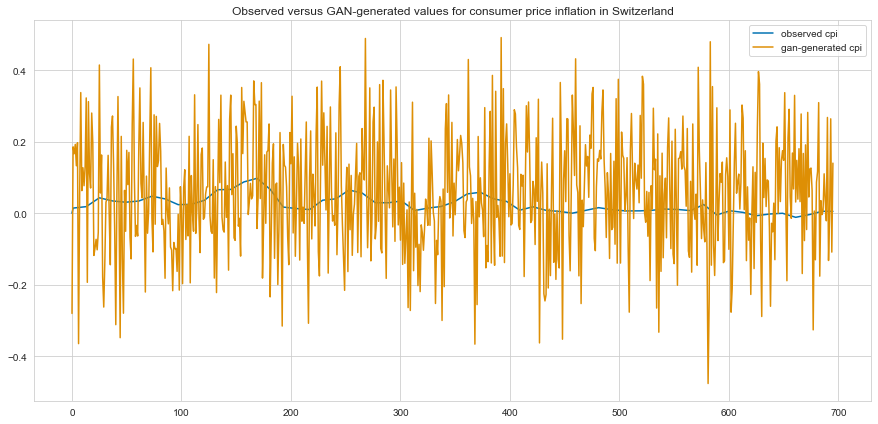

In [70]:
plt.figure(figsize=(15,7))
plt.plot(gan_y, label='observed cpi')
plt.plot(generated_y, label='gan-generated cpi')
plt.legend()
plt.title('Observed versus GAN-generated values for consumer price inflation in %s' % country)
plt.show()

In [71]:
print('rmse: %s\nmean observed: %s\nmean generated: %s' % (np.sqrt(mean_squared_error(gan_y, generated_y)),
                                                           np.mean(gan_y), np.mean(generated_y)))

rmse: 0.17074817927234717
mean observed: 0.0250163681880437
mean generated: 0.05681097


## Exploration 3
--------------------

**Sequence transformer network** to generate training data, **LSTM** trained on generated data validated on the real data. See https://arxiv.org/abs/1808.06725